# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [40]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [41]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [42]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [43]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

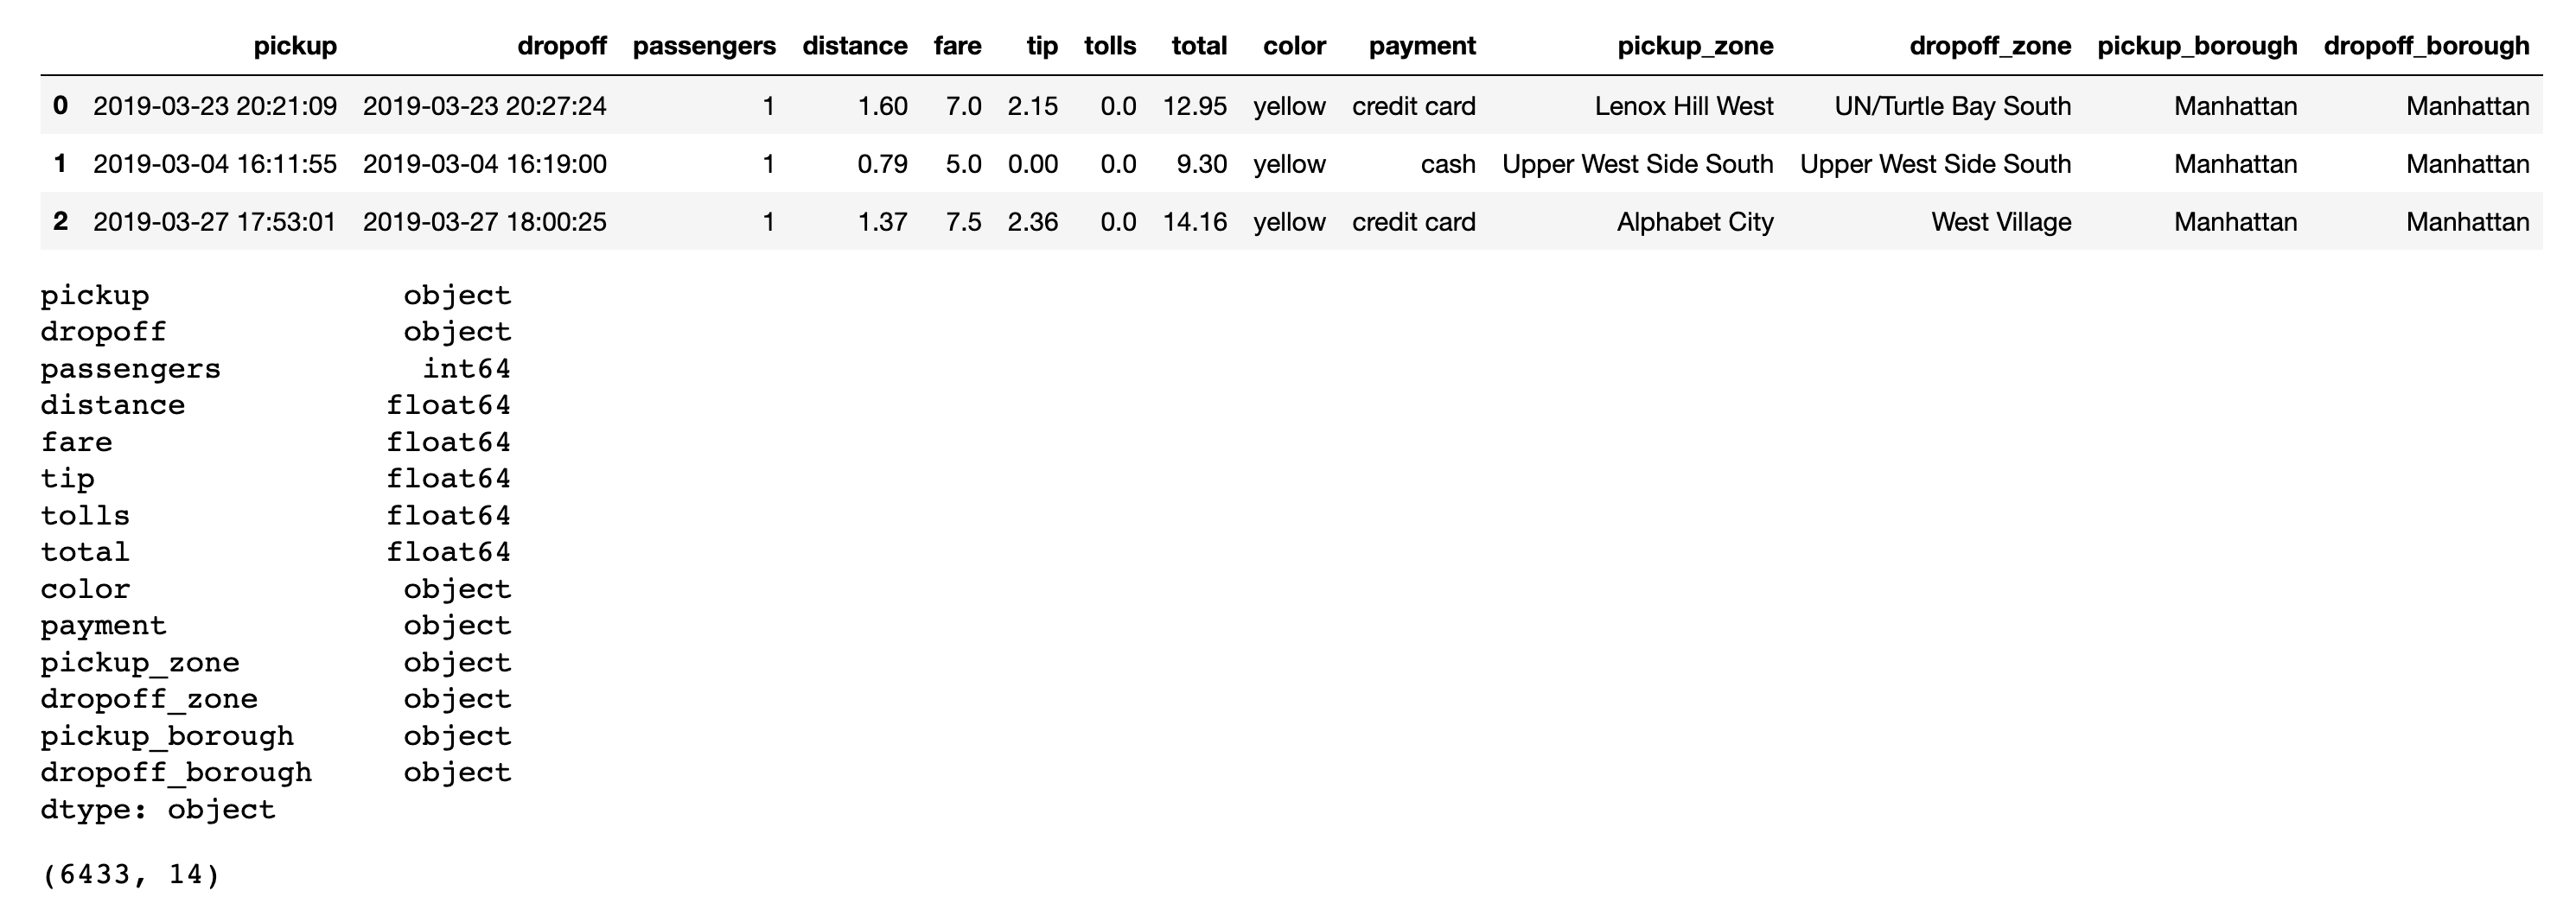

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [44]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

По даним у таблиці вище, можна помітити, що кількість пропущений значень "dropoff_zone" та "dropoff_borough" однакова, а саме пропущено 45 рядків, так само як і "pickup_zone" та "pickup_borough", пропущено 26 рядків. Тобто, коли не зазначають при замовленні місце посадки, то і зона, так само як і з висадкою не підтягується у базу даних.
По даним з таблиці нижче видно, що там де відсутні дані по районам, відстань поїздки для більшості записів дорівнює 0, або незначна, тобто можна зробити припущення, що замовлення було скасоване, також цей висновок можна зробити судячи з часу замовлення "pickup" та "dropoff". Також yellow cab в Америці можна зловити з руки та назначити кінцеву точку як "по місту", оплата за проїзд буде здійснюватись за кілометраж. Тобто таким чином можна заїхати в декілька місць по маршруту, попросити водія почекати десь, без зазначення йому кінцевої точки поїздки, тобто імпровізувати з маршрутом на ходу. 

In [54]:
df_taxi[df_taxi[['payment']].isna().any(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.4,8.5,0.0,0.00,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
445,2019-03-19 06:57:14,2019-03-19 07:00:08,1,1.3,5.5,0.0,0.00,6.30,yellow,NaN,Boerum Hill,Columbia Street,Brooklyn,Brooklyn
491,2019-03-07 07:11:33,2019-03-07 07:11:39,1,1.6,2.5,0.0,0.00,5.80,yellow,NaN,Murray Hill,Murray Hill,Manhattan,Manhattan
545,2019-03-27 11:03:43,2019-03-27 11:14:34,1,4.2,15.0,0.0,0.00,15.80,yellow,NaN,LaGuardia Airport,Forest Hills,Queens,Queens
621,2019-03-15 17:16:35,2019-03-15 17:25:01,1,1.3,7.5,0.0,0.00,11.80,yellow,NaN,Upper East Side North,Upper East Side South,Manhattan,Manhattan
770,2019-03-02 03:16:59,2019-03-02 03:17:06,0,9.4,2.5,0.0,0.00,3.80,yellow,NaN,JFK Airport,JFK Airport,Queens,Queens
913,2019-03-23 11:26:58,2019-03-23 11:35:17,2,1.3,7.5,0.0,0.00,10.80,yellow,NaN,Upper East Side South,Lincoln Square West,Manhattan,Manhattan
953,2019-03-08 02:58:37,2019-03-08 03:19:27,2,6.9,23.5,0.0,0.00,27.30,yellow,NaN,Garment District,Central Harlem North,Manhattan,Manhattan
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.0,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1372,2019-03-12 09:19:44,2019-03-12 09:43:09,1,1.6,14.5,0.0,0.00,17.80,yellow,NaN,Midtown East,Garment District,Manhattan,Manhattan


In [55]:
df_taxi[df_taxi[['pickup_zone', 'dropoff_borough']].isna().all(axis=1)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
2137,2019-03-08 13:27:32,2019-03-08 13:46:23,1,1.40,12.0,3.05,0.00,18.35,yellow,credit card,NaN,NaN,NaN,NaN
2742,2019-03-23 06:20:27,2019-03-23 06:20:59,1,0.00,55.0,0.00,0.00,55.80,yellow,credit card,NaN,NaN,NaN,NaN
3085,2019-03-24 15:43:02,2019-03-24 16:02:57,1,3.20,14.5,0.00,0.00,15.30,yellow,cash,NaN,NaN,NaN,NaN
3259,2019-03-30 00:39:09,2019-03-30 00:43:34,1,0.84,5.0,1.70,0.00,10.50,yellow,credit card,NaN,NaN,NaN,NaN
3644,2019-03-19 23:30:50,2019-03-19 23:32:33,2,0.00,103.0,20.65,0.00,123.95,yellow,credit card,NaN,NaN,NaN,NaN
3889,2019-03-30 06:42:55,2019-03-30 06:43:00,1,0.00,2.5,0.00,0.00,3.30,yellow,cash,NaN,NaN,NaN,NaN


Як ми бачимо з датасету нижче, 'distance' дорівнює 0, а 'total' не дорівнює 0 і судячи з часу "pickup" та "dropoff" замовлення було скасоване.Оскільки замовлення мають "fare" - базову плату за поїздку та "tolls" - плату за платні дороги, можливо, в"їзд на місце подачі авто, то клієнт все одно у разі відміни замовлення має сплатити ці обов"язкові платежі. Клієнт має певний час на відміну замовлення, наприклад в Uber до 3-х хв., якщо перелімітити час і зробити скасування замовлення, то "попадаєш" на обов"язкові платежі по замвленню. Якщо у вас прив"язана карта, як спосіб оплати за поїздку, то гроші будуть списані одразу, якщо готівка, то при наступному замовленні данна сума буде додана до вартості поїздки.

In [57]:
df_taxi[(df_taxi['distance'] == 0) & (df_taxi['total'] != 0)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [73]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [74]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

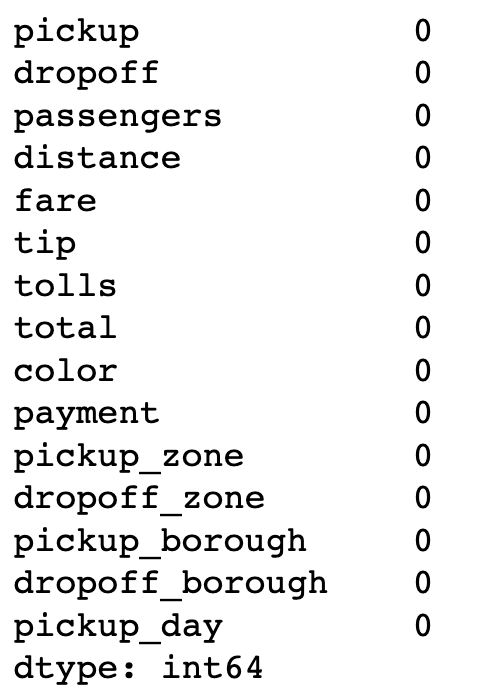

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [75]:
df_taxi_clean['pickup'] = pd.to_datetime(df_taxi_clean['pickup'])

Після виконання завдання запустіть наступну клітинку:

In [76]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

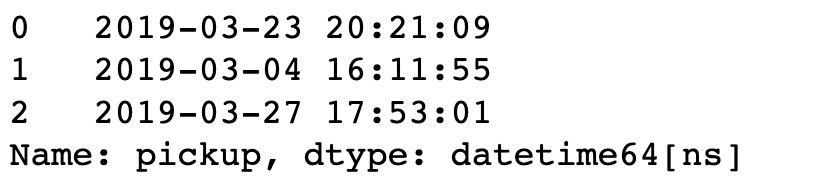

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [77]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

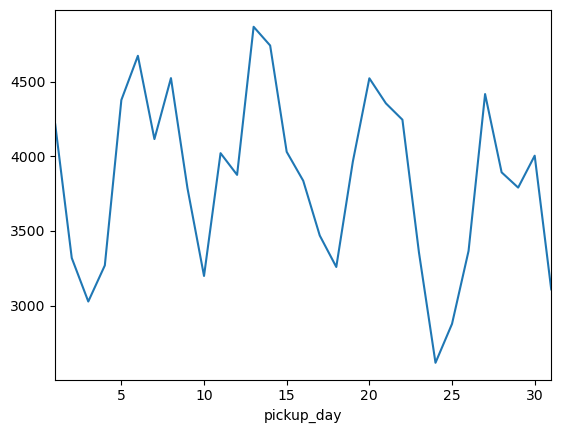

In [85]:
df_taxi_clean.groupby(df_taxi_clean['pickup_day'].dt.day)['total'].sum().plot()
plt.xlabel('pickup_day')
plt.xlim(1, 31);

Навіть після того як закоментувати рядок xlim, викид за 2019-02-28 не відображається на графіку, хоча нижче у табл. видно, що він є.

Очікується графік:

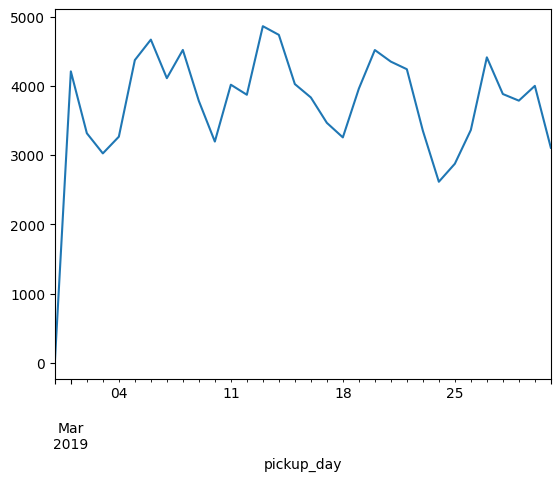

6.Виведіть кількість рядків для кожного pickup_day.

In [86]:
df_taxi_clean['pickup_day'].value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: pickup_day, dtype: int64

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [87]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']

In [17]:
df_taxi_clean['pickup_day'].value_counts()

2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-23    209
2019-03-11    209
2019-03-29    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
Name: pickup_day, dtype: int64

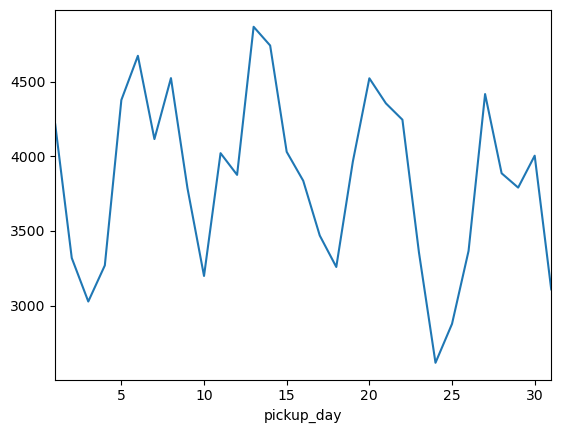

In [88]:
z = df_taxi_clean.groupby(df_taxi_clean['pickup_day'].dt.day)['total'].sum()
plt.plot(z)
plt.xlim(1, 31)
plt.xlabel('pickup_day')
plt.show();

Очікуваний графік:

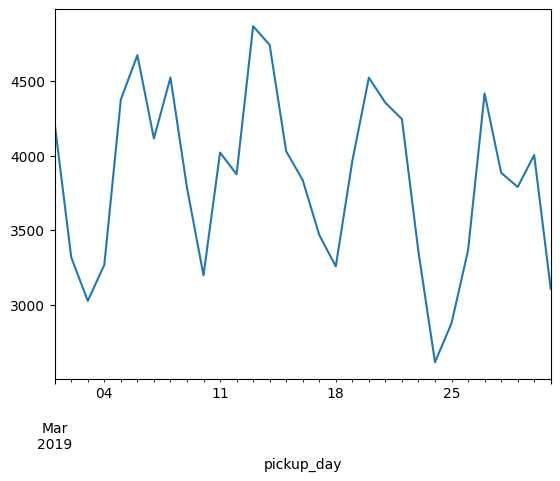

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [115]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values = 'total', aggfunc='sum').drop('NA', axis = 1)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


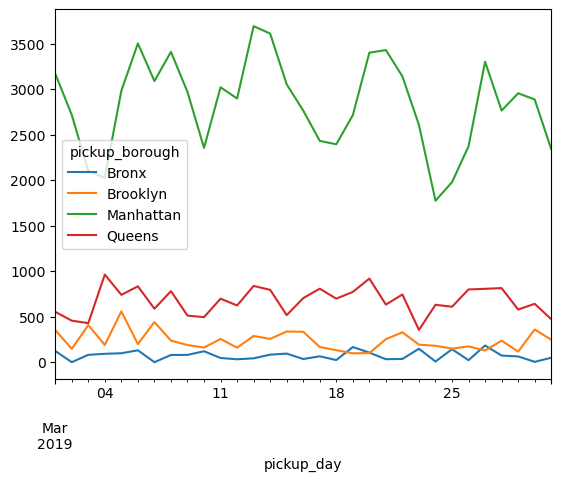

In [95]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

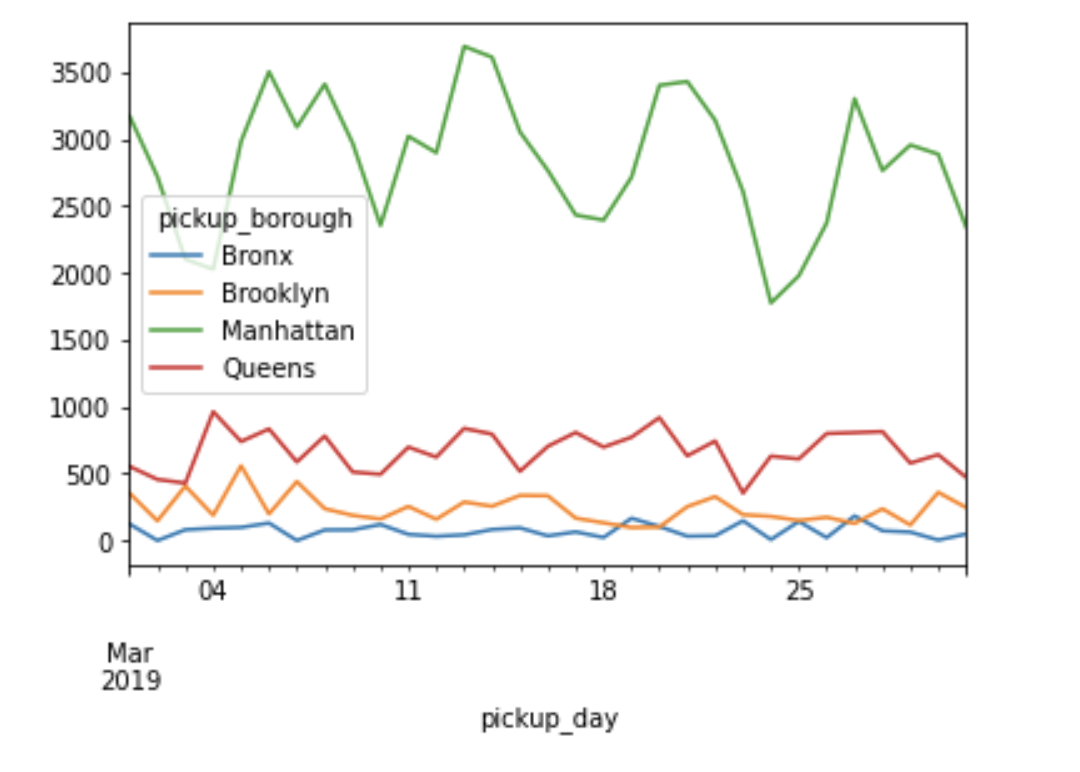

Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?
До речі, також рекомендую спробувати запустити команду borough_pivot.plot() та зрозуміти, навіщо нам тут частина fillna(0).

Найбільша сума платежів за поїздки на таксі у районі Manhattan.
borough_pivot.plot() без частини fillna(0) будує приривчасту лінію у місцях, де відсутні дані з"являються дірки на лінії графіку. 

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

Кількість бінів підбирала під референс правильної відповіді знизу та зовнішньої інтерпертації візуальних даних на око. Чим більша кількість бінів, тим менше даних потрапляє у кожний з наборів і гістограма стає приривчастою. Тому, як на мене, 6 в даному випадку оптимальна кількість бінів.

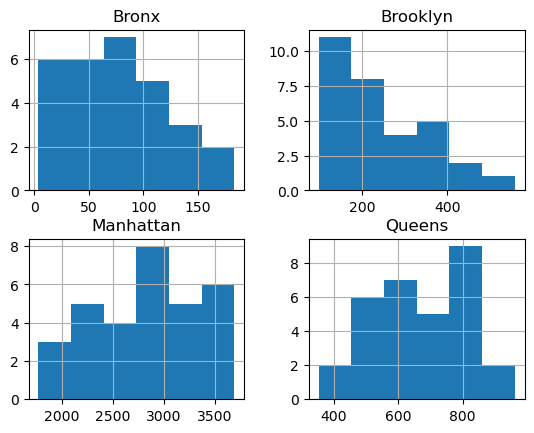

In [100]:
borough_pivot.hist(bins = 6);

Приклад одного з правильних виконань завдання:

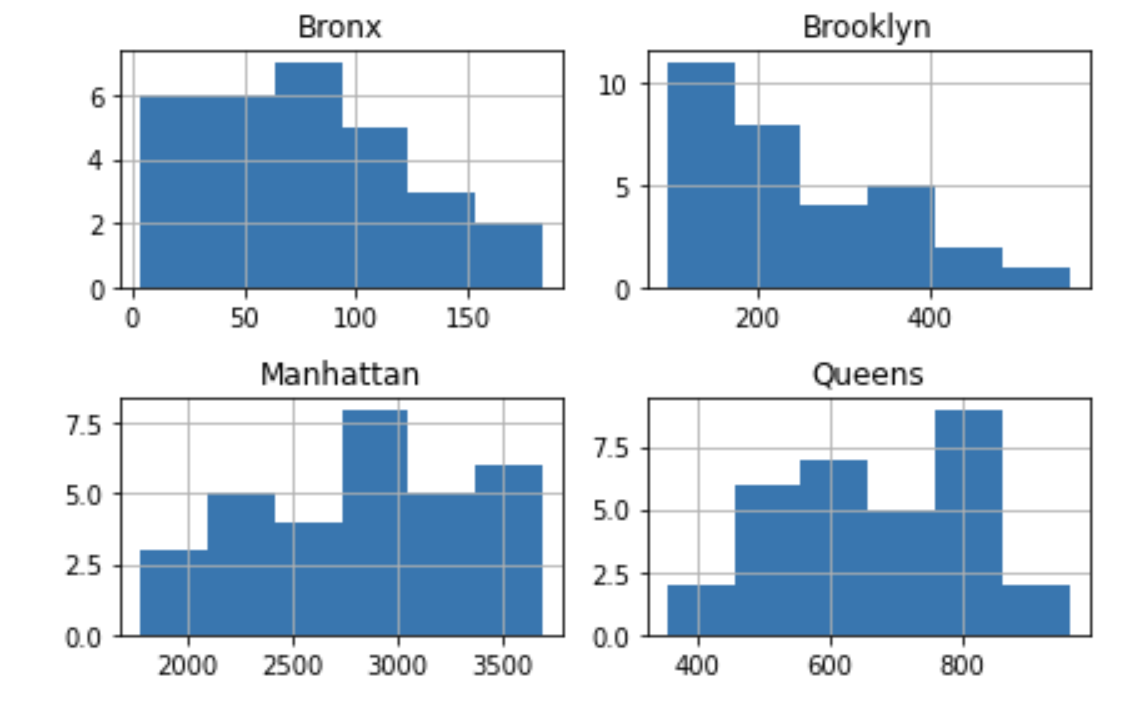

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

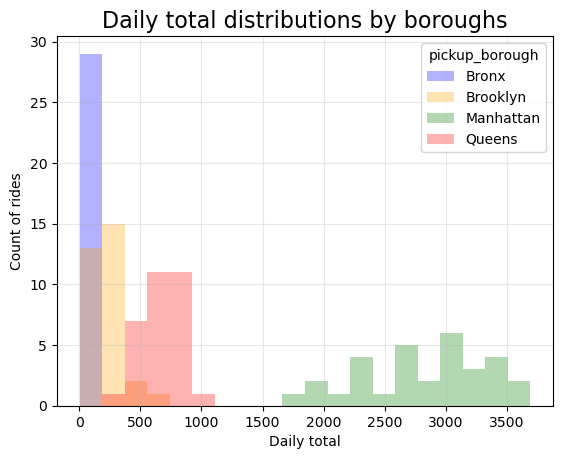

In [130]:
borough_pivot.plot.hist(alpha=.3, bins=20, color=['blue', 'orange', 'green', 'red'])
plt.grid(axis='both', alpha=.3)
plt.title("Daily total distributions by boroughs", fontsize=16)
plt.xlabel('Daily total')
plt.ylabel('Count of rides');

Щось на моєму графіку Bronx в лідерах, а не Brooklyn, хоча я зсилаюсь на той самий borough_pivot і навіть, збільшення кількості бінів не змінює ситуацію з лідером.

Очікуваний результат:

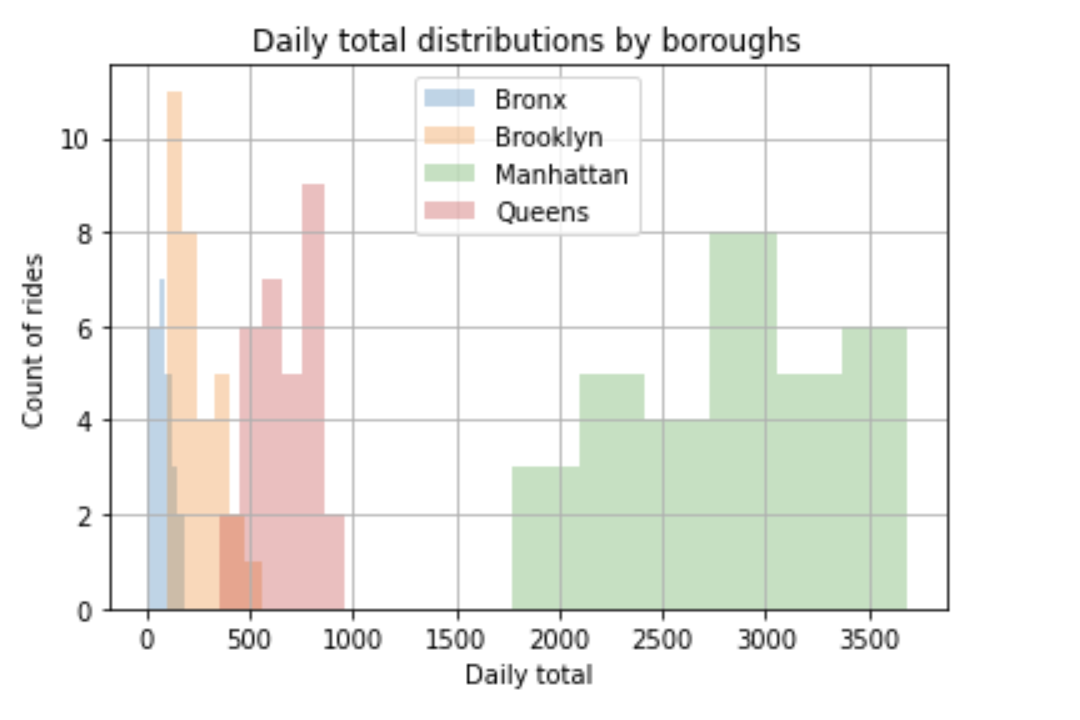

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

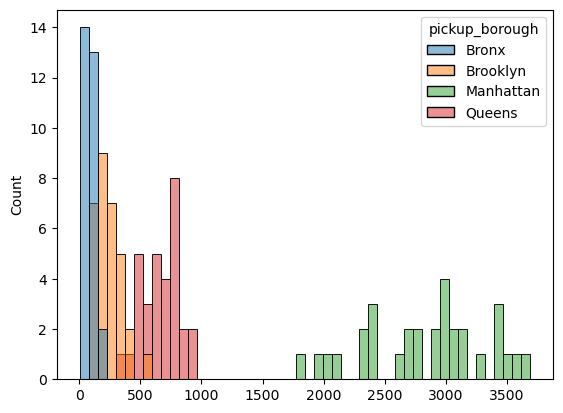

In [131]:
sns.histplot(data=borough_pivot, bins=50);

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

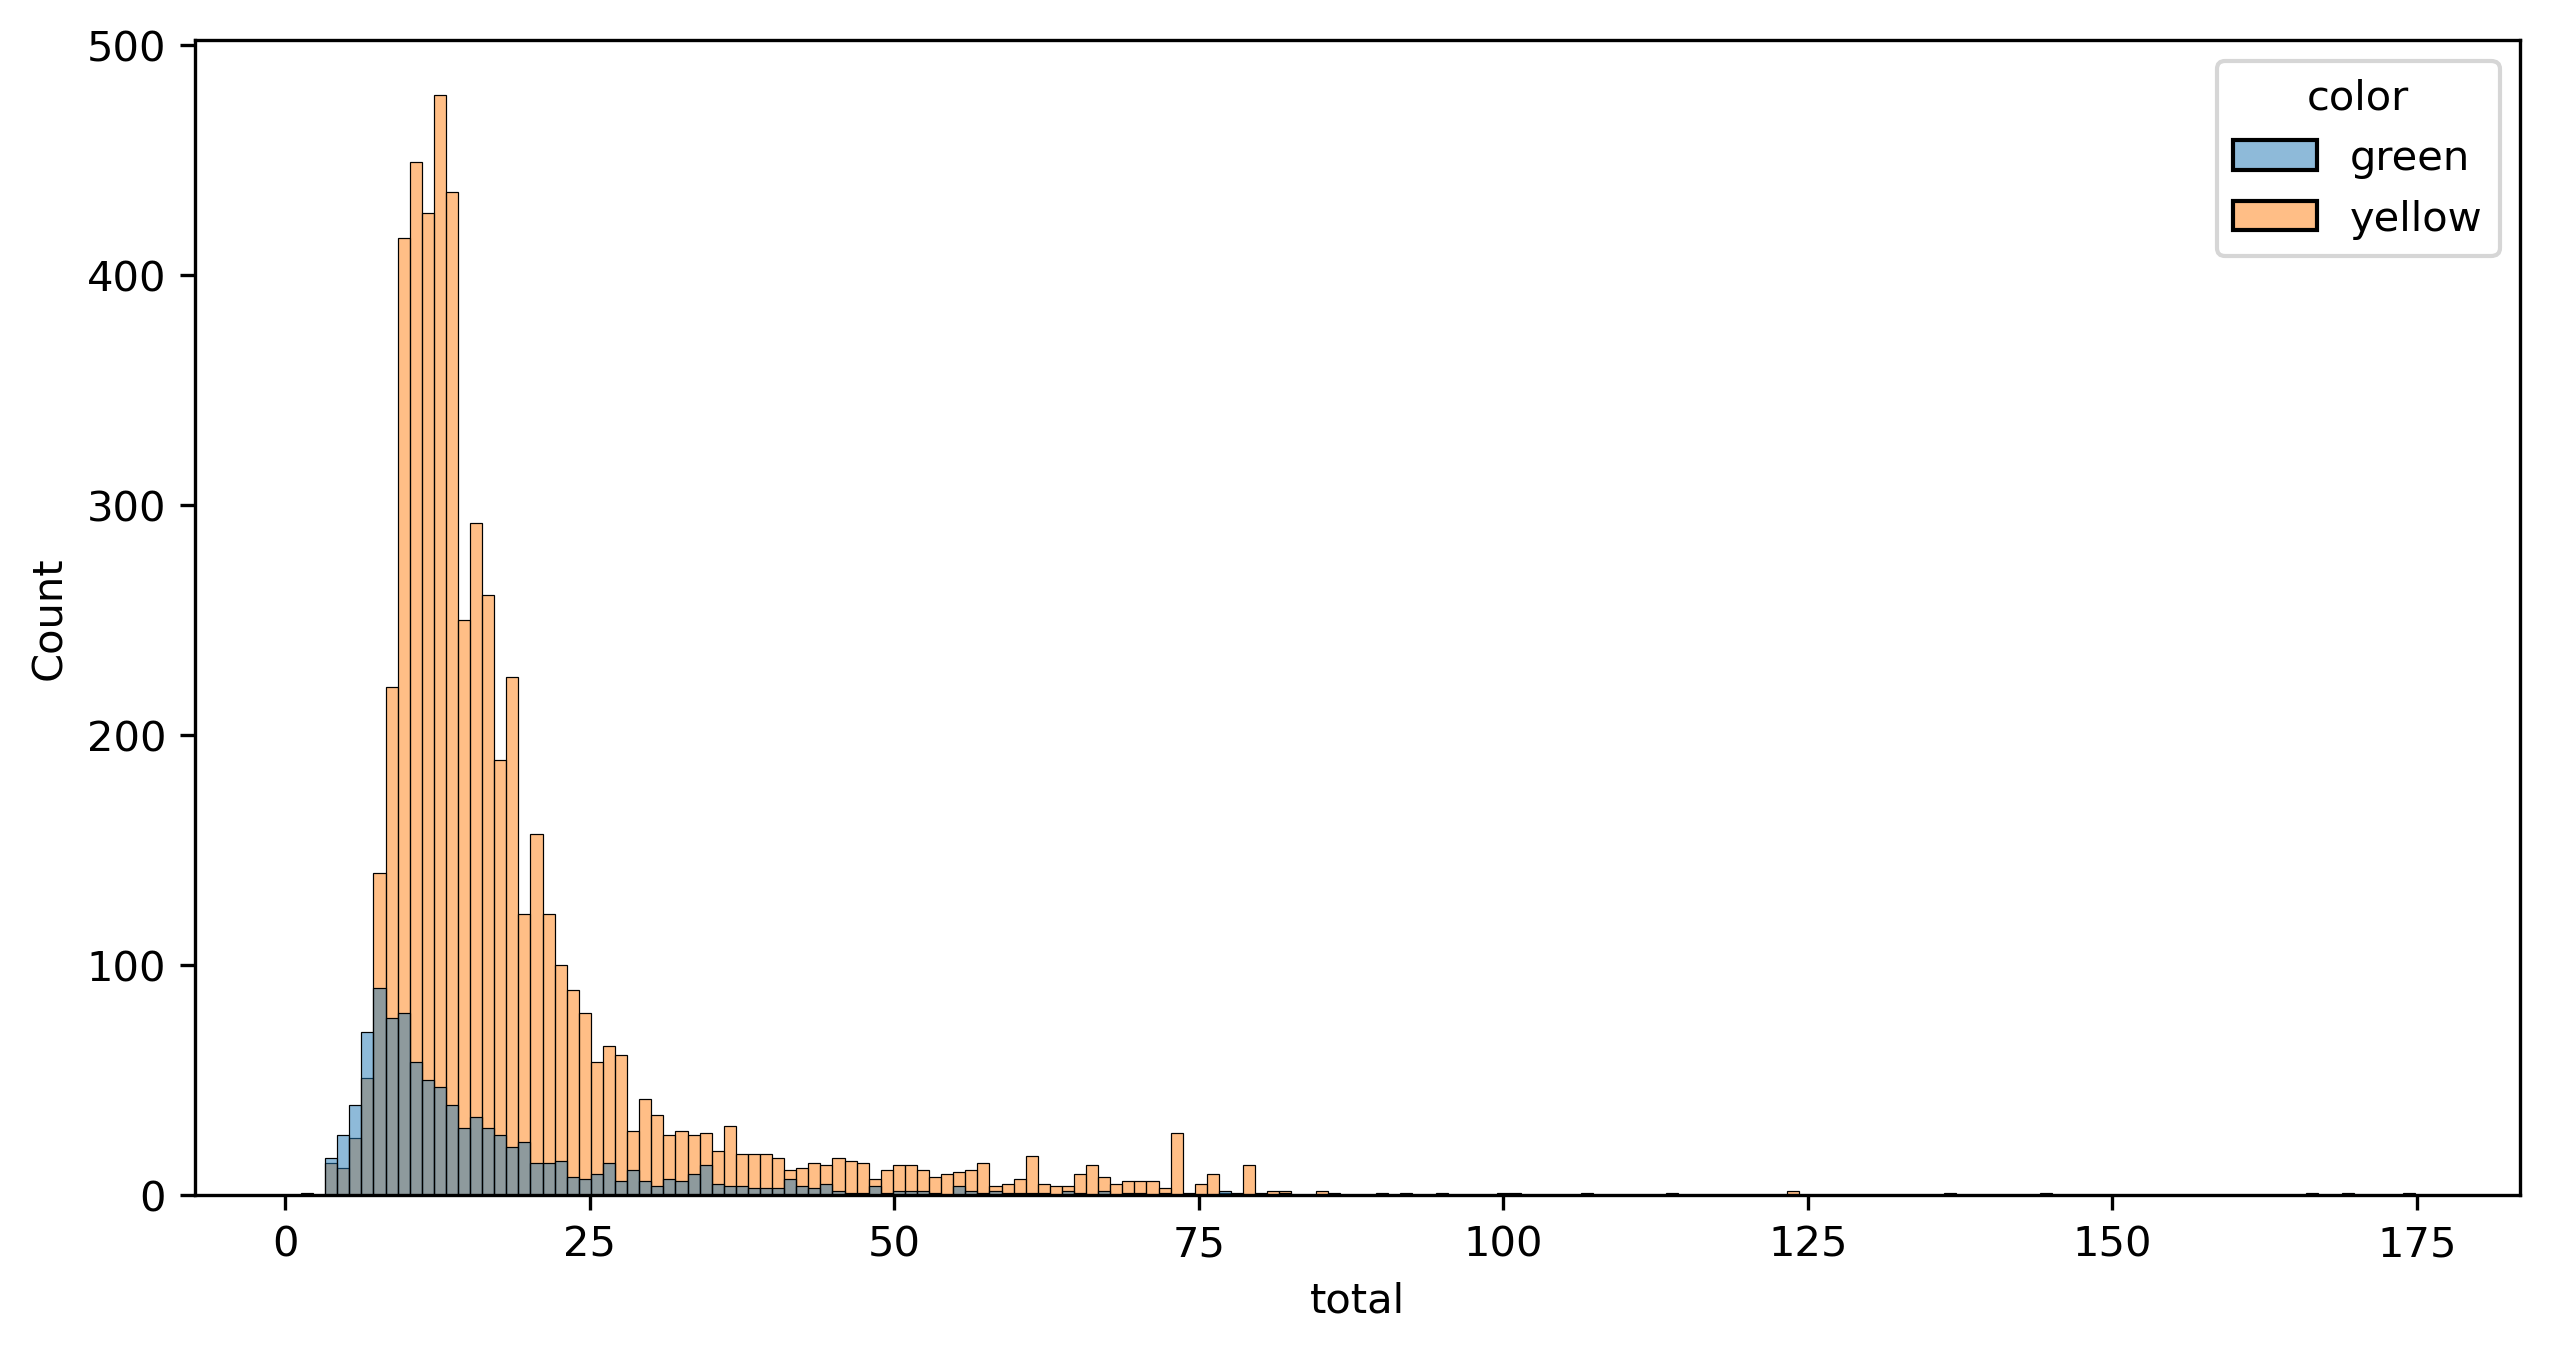

In [27]:
df_taxi_clean = df_taxi_clean.sort_values('color')
plt.figure(figsize=(10, 5), dpi=300);
sns.histplot(data=df_taxi_clean, x='total', hue='color', bins=175);

Очікуваний результат:

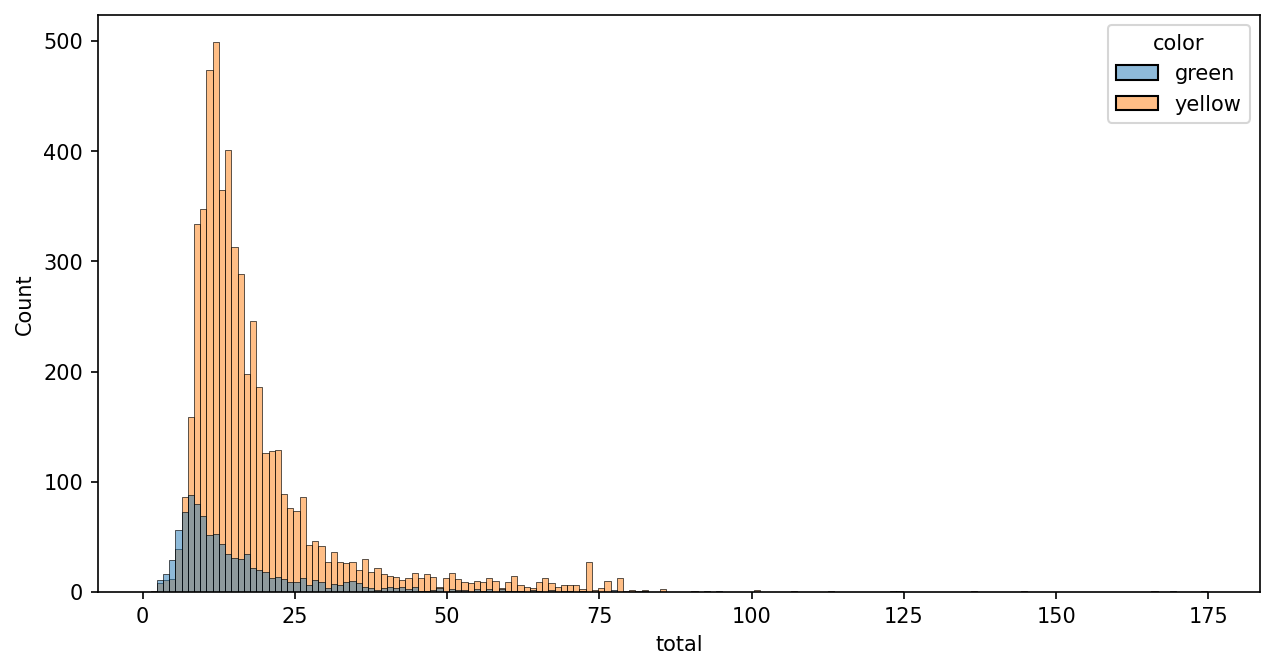

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

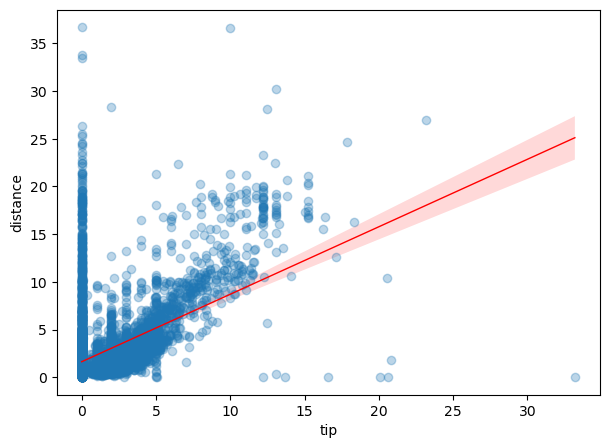

In [132]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.regplot(
    data=df_taxi_clean,
    x='tip', y='distance',
    line_kws={'color': 'red', 'lw': 1},
    ax=ax,
    scatter=False
);
ax.scatter(
    x=df_taxi_clean['tip'],
    y=df_taxi_clean['distance'],
    alpha=0.3
);

Один з можливих результатів (побудовано з seaborn):

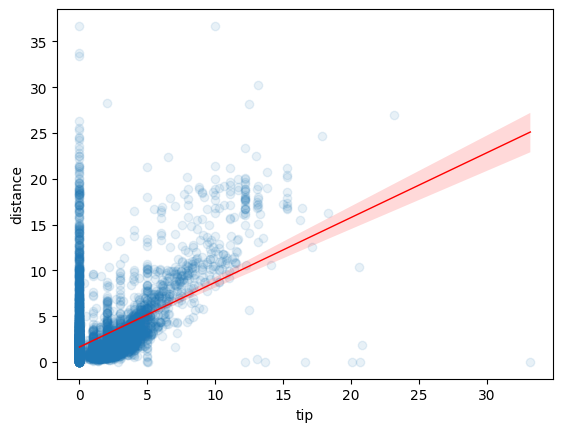

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

Пряма лінія з точок паралельна осі дальності поїздки говорить про те, що незалежно від кілометражу поїздки велика кількість пасажирів все одно не залишає чайові, а так як до 10 км дальності поїздки ця лінія майже суцільна, можна говорити про те, що зі збільшенням км поїздки люди більше залишають чайові, і все менше залишається точок на великих дистанціях з нульовими чайовими. Хоча до 10 км багато пасажирів дають чайові у розмірі до 5%.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- в якому районі найнижчий середній розмір чайових,
- а в поїздках з якого району найвижчий середній розмір чайових?
- при поїздках з якого району розмір чайових найстабільніший (найменше змінюється з дня у день)?

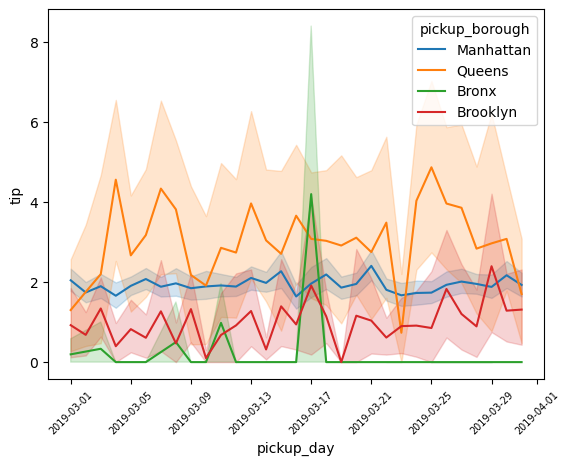

In [133]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.lineplot(
    data=df_taxi_clean,
    x='pickup_day',
    y='tip',
    hue='pickup_borough'
);
plt.xticks(
    rotation=45,
    fontsize=7
);

Найнижчий середній розмір чайових у Bronx. Найвижчий середній розмір чайових при поїздках з району Queens. При поїздках з району  Manhattan розмір чайових найстабільніший.

Один з можливих результатів (побудовано з seaborn):

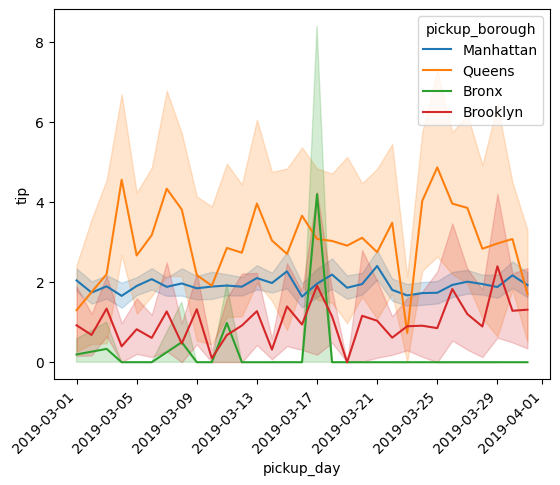

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

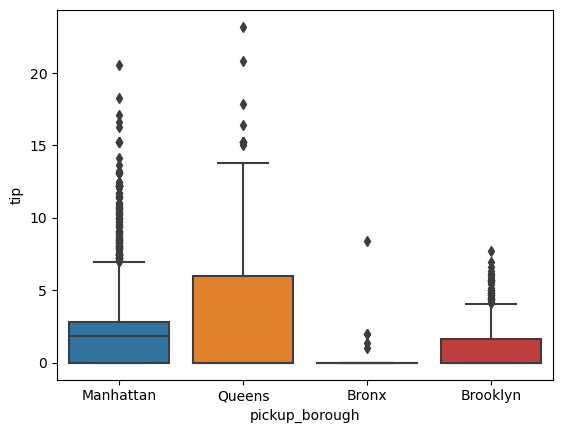

In [134]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.boxplot(
    data=df_taxi_clean,
    x='pickup_borough',
    y='tip'
);

Один з можливих результатів (побудовано з seaborn):

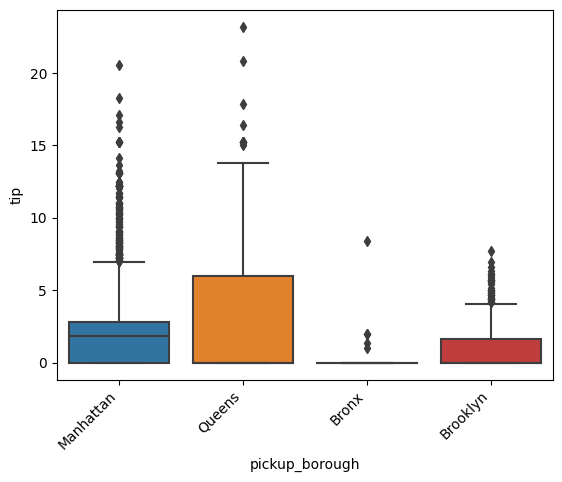

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

1. Яке співвідношення по дням місяця по кольорам авто та сумам заробітку?

In [135]:
df_taxi_clean['color'].value_counts()

yellow    5429
green      977
Name: color, dtype: int64

Як ми бачимо кількість зелених авто значно менша за кількість жовтих. Ця інформація більше як постфактум аналіз в даному випадку, але можливо є День yellow cab, green cab, або ще якісь відповідні свята і це має сенс збільшити кількість авто певного кольору. Або якщо зробити дану деталізацію по району, можна побачити, що певний район замовляє авто саме такого кольору більше, хоча навряд чи. Так що просто картинка/аналітика по творчому завданню :)

<Figure size 1000x500 with 0 Axes>

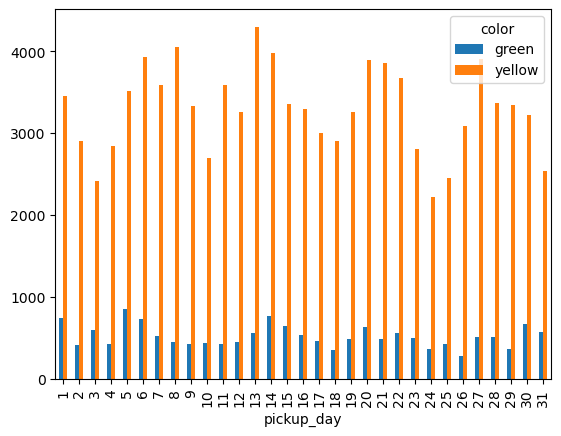

In [136]:
grouped_totals = df_taxi_clean.groupby([df_taxi_clean['pickup_day'].dt.day, 'color'])['total'].sum().reset_index()
plt.figure(figsize=(10, 5));
grouped_totals.pivot(index='pickup_day', columns='color', values='total').plot(kind='bar');

2. Які види оплати поїздки по районах?

In [140]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['payment'] != 'NA']
pivot = df_taxi_clean.pivot_table(index=['pickup_borough'], columns=['payment'], aggfunc='size')
pivot

payment,cash,credit card
pickup_borough,,
Bronx,25,74
Brooklyn,119,261
Manhattan,1397,3839
Queens,265,383


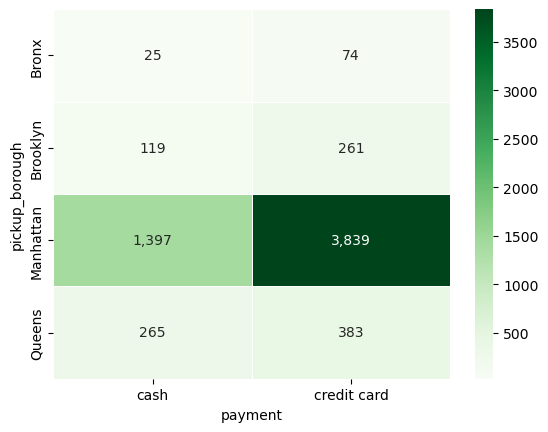

In [35]:
sns.heatmap(pivot, cmap='Greens', annot=True, fmt=',.0f', linewidths=0.5);

3. Який розподіл кількості пасажирів в залежності від району?

In [141]:
pivot1 = df_taxi_clean.pivot_table(index=['pickup_borough'], columns=['passengers'], aggfunc='size').fillna(0)
pivot1

passengers,0,1,2,3,4,5,6
pickup_borough,,,,,,,
Bronx,1.0,88.0,6.0,1.0,0.0,3.0,0.0
Brooklyn,1.0,322.0,34.0,6.0,1.0,9.0,7.0
Manhattan,80.0,3726.0,756.0,213.0,97.0,234.0,130.0
Queens,8.0,488.0,72.0,22.0,11.0,31.0,16.0


Вище інформація у вигляді таблиці, нижче та ж сама тільки візуально.

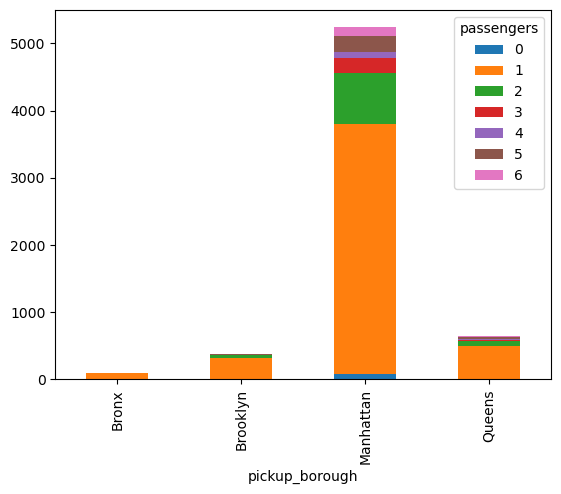

In [142]:
grouped = df_taxi_clean.groupby(['pickup_borough', 'passengers']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True)
plt.show()